## 코로나 : 시각화를 통한 인사이트 도출

**참고 팀**: https://visualisingkorea.com/

### 1. 준비.

In [5]:
# 필요한 라이브러리를 가져온다.
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [6]:
# Pandas 데이터 프레임에서 float을 소수점 4자리 까지 출력해 준다.
pd.set_option("precision",4)

In [7]:
# 성가신 경고를 꺼준다.
import warnings  
warnings.filterwarnings('ignore')

In [8]:
# 환자정보 데이터를 불러온다.
df1 = pd.read_csv('C:/study_data/bigdata/별첨 2_DACON_코로나 데이터 분석_업데이트 2/data/PatientInfo.csv')

In [9]:
df1.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [10]:
# 컬럼의 자료형을 살펴본다.
df1.info()
# 명목형 컬럼이 많다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          4004 non-null   int64  
 1   global_num          2806 non-null   float64
 2   sex                 3674 non-null   object 
 3   birth_year          3267 non-null   object 
 4   age                 3525 non-null   object 
 5   country             4004 non-null   object 
 6   province            4004 non-null   object 
 7   city                3926 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      3211 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         899 non-null    object 
 12  contact_number      680 non-null    object 
 13  symptom_onset_date  535 non-null    object 
 14  confirmed_date      4001 non-null   object 
 15  released_date       1508 non-null   object 
 16  deceas

### 2. 기초적인 탐색.

In [11]:
# 결측치의 총 카운트.
# df1.isnull().sum() # 컬럼별로 결측치를 집결할 수 있다.
df1.isnull().sum().sum()

27910

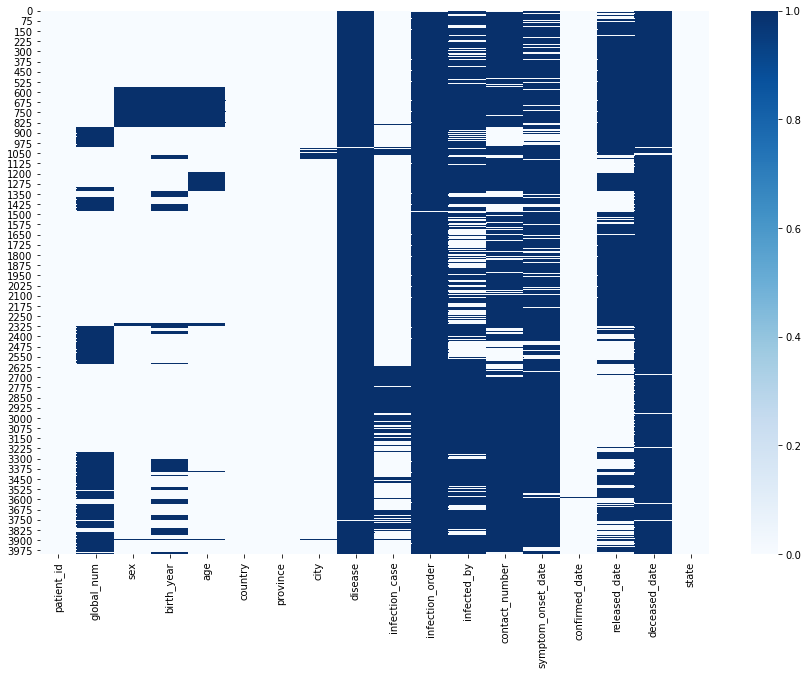

In [12]:
# 결측치를 시각화 해본다.
plt.figure(figsize = (15,10))                                       # figsize=(가로, 세로) 크기.
sns.heatmap(df1.isnull(), cmap='Blues', cbar=False)
# hitmap = 데이터의 값에 따라서 값의 분포를 나타내줘서 표현할 수 있다. cmap = 그래프의 표현 방법 , cbar = 값의 농도에 따라 달라지는 색을 표시해주는 바
plt.show()

In [13]:
# 중복된 환자 ID는 없어 보인다.
print("데이터 행의 수 = {}".format(df1.shape[0]))                  # 데이터 행의 수 = 4004
print("고유한 환자 ID 수 = {}".format(df1.patient_id.nunique()))   # 고유한 환자 ID 수 = 4004

데이터 행의 수 = 4004
고유한 환자 ID 수 = 4004


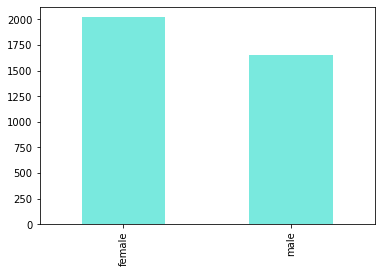

In [14]:
# 명목형 변수인 Sex를 시각화 해본다.
sex_counts = df1.sex.value_counts()              
sex_counts = sex_counts.sort_values(ascending=False)
sex_counts.plot.bar(color='turquoise', alpha=0.7)
plt.show()

In [15]:
# Age 변수의 유형 출력.
df1.age.unique()

array(['50s', '30s', '20s', '60s', '80s', '70s', '40s', '10s', '90s',
       '0s', nan, '30', '100s'], dtype=object)

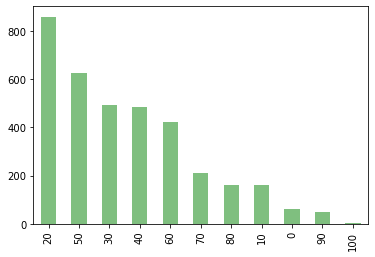

In [16]:
# 명목형 변수인 Age를 시각화 해본다.
df1.age = df1.age.str.replace('s','',regex=True)                      # 's' 제거.
age_counts = df1.age.value_counts()                                   # 도수표.
age_counts = age_counts.sort_values(ascending=False)
age_counts.plot.bar(color='green', alpha=0.5)
plt.show()

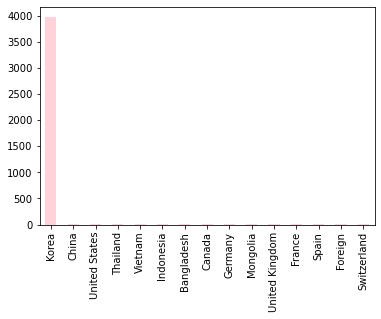

In [17]:
# 명목형 변수인 Country를 가지고 국적별로 시각화 해본다.
country_counts = df1.country.value_counts()                 
country_counts = country_counts.sort_values(ascending=False)
country_counts.plot.bar(color='pink', alpha = 0.7)
plt.show()

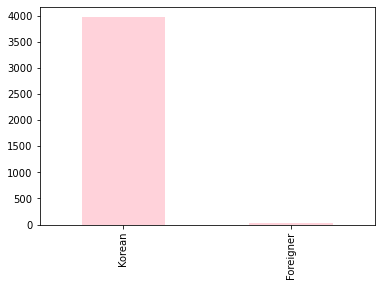

In [18]:
# 명목형 변수인 Country를 가지고 내국인 여부를 시각화 해본다.
country_counts = (df1.country == "Korea").value_counts()
country_counts = country_counts.sort_values(ascending=False)
country_counts.index = ["Korean", "Foreigner"]
# country로 새로운 시리즈를 만들었기 때문에 index가 True False(value_counts)로 만들어졌기 때문에 rename해준다.
country_counts.plot.bar(color= "pink",alpha=0.7)
plt.show()

In [19]:
# 기저질환 (disease)는 결측치 아닌 정상값의 수가 절대적으로 부족해서 분석하기 어려움.
df1.disease.count()

18

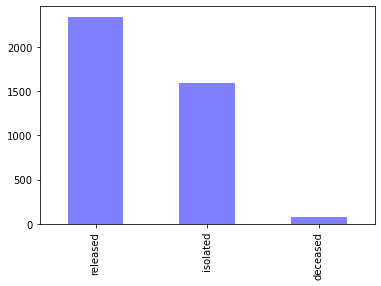

In [20]:
# 명목형 변수인 State를 시각화 해본다.
state_counts = df1.state.value_counts()              
state_counts = state_counts.sort_values(ascending=False)
state_counts.plot.bar(color='blue', alpha=0.5)
plt.show()

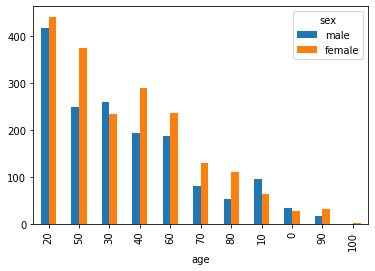

In [21]:
# 명목형 변수인 Age와 Sex를 조합하여 시각화 해본다.
ct = pd.crosstab(df1.age, df1.sex)
ct['total'] = ct.male + ct.female                      # total 컬럼.
ct.sort_values(by=['total'], ascending=False)[['male','female']].plot.bar()   # total로 소팅. total은 시각화에서는 제외!
plt.show()

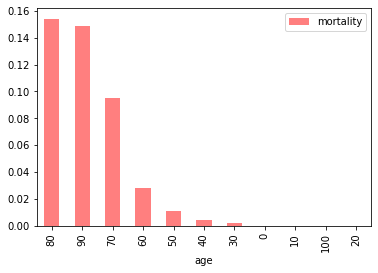

In [22]:
# Age별 사망비율.
ct = pd.crosstab(df1.age, df1.state=='deceased')
ct.columns = ['alive','deceased']
ct['mortality'] = ct.deceased/(ct.alive + ct.deceased)  # 사망의 비율을 알기 위해 
ct.sort_values(by=['mortality'], ascending=False)[['mortality']].plot.bar(color='red', alpha=0.5)   # mortality로 소팅 및 시각화.
plt.show()

In [23]:
# Age와 사망여부 독립성 검정. (아직 다루지 않음)
stat, p_val, degFree, expected = st.chi2_contingency(ct[['alive','deceased']])    # 통계량, p-값, 자유도, 기대도수.
print("p_value : {}".format(np.round(p_val,3)))                                   # 독립이 아님!

p_value : 0.0


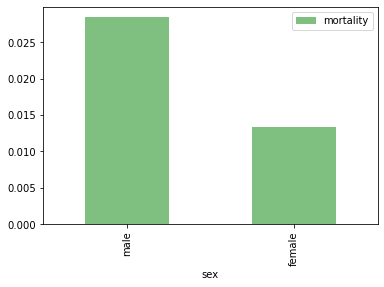

In [24]:
# Sex별 사망비율.
ct = pd.crosstab(df1.sex, df1.state=='deceased')
ct.columns = ['alive','deceased']
ct['mortality'] = ct.deceased/(ct.alive + ct.deceased)
ct.sort_values(by=['mortality'], ascending=False)[['mortality']].plot.bar(color='green', alpha=0.5)   # mortality로 소팅 및 시각화.
plt.show()

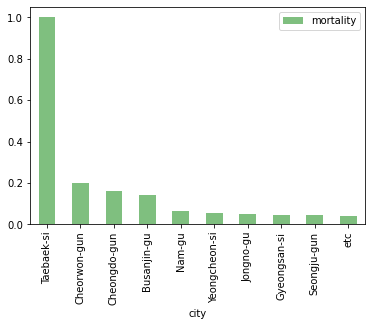

In [25]:
# city별 사망비율 top10
ct = pd.crosstab(df1.city, df1.state=='deceased')
ct.columns = ['alive','deceased']
ct['mortality'] = ct.deceased/(ct.alive + ct.deceased)
ct.sort_values(by=['mortality'], ascending=False)[['mortality']][:10].plot.bar(color='green', alpha=0.5)   # mortality로 소팅 및 시각화.
plt.show()

In [26]:
# Sex와 사망여부 독립성 검정. ( 아직 다루지 않음 )
stat, p_val, degFree, expected = st.chi2_contingency(ct[['alive','deceased']])    # 통계량, p-값, 자유도, 기대도수.
print("p_value : {}".format(np.round(p_val,3)))                                   # 독립이 아님!

p_value : 0.0


### 3. 감염 경로 유형 (Infection Case)

In [27]:
# 감염 경로의 유형 출력.
print(df1.infection_case.unique())

['overseas inflow' 'contact with patient' 'Seongdong-gu APT' 'etc'
 "Eunpyeong St. Mary's Hospital" 'Shincheonji Church' 'Dongan Church'
 'Guro-gu Call Center' nan 'Itaewon Clubs' 'Samsung Medical Center'
 'Coupang Logistics Center' 'Guri Collective Infection'
 'KB Life Insurance' 'Yeongdeungpo Learning Institute' 'Onchun Church'
 'Cheongdo Daenam Hospital' 'Suyeong-gu Kindergarten'
 'Ministry of Oceans and Fisheries' 'gym facility in Cheonan'
 'gym facility in Sejong' 'River of Grace Community Church'
 'Gyeongsan Seorin Nursing Home' 'Gyeongsan Cham Joeun Community Center'
 'Gyeongsan Jeil Silver Town' 'Bonghwa Pureun Nursing Home'
 'Pilgrimage to Israel' 'Milal Shelter' 'Geochang Church'
 'Changnyeong Coin Karaoke']


In [28]:
# 감염 경로의 가지수 출력.
print(df1.infection_case.nunique())

29


In [29]:
# 감염 경로별 환자수 집계하여 시각화 한다.
res = df1.groupby(['infection_case'])['patient_id'].count()        # 결측치가 아닌 patient_id의 수 = 환자의 수.
res = res.reset_index()                                           # Series => DataFrame. 이전의 Index가 이제는 새로운 컬럼!
res.rename(columns = {'infection_case':'infection case', 'patient_id': 'count'}, inplace = True)     # 'patient_id' 컬럼명을 'count'로 변경.
res = res.sort_values(by = 'count', ascending = False)            # 데이터 프레임 내림 차순으로 소팅.
display(res)

,infection case,count
24,contact with patient,1182
28,overseas inflow,703
25,etc,601
12,Itaewon Clubs,156
8,Guro-gu Call Center,112
21,Shincheonji Church,107
3,Coupang Logistics Center,70
16,Onchun Church,33
0,Bonghwa Pureun Nursing Home,31
26,gym facility in Cheonan,30


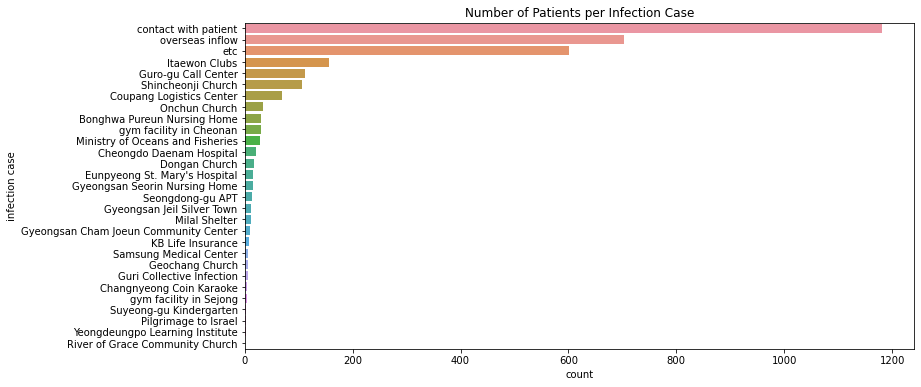

In [30]:
# 감염 경로별 환자수 집계하여 시각화 한다.
res = df1.groupby(['infection_case'])['patient_id'].count()        # 결측치가 아닌 patient_id의 수 = 환자의 수.
res = res.reset_index()                                           # Series => DataFrame. 이전의 Index가 이제는 새로운 컬럼!
res.rename(columns = {'infection_case':'infection case', 'patient_id': 'count'}, inplace = True)     # 'patient_id' 컬럼명을 'count'로 변경.
res = res.sort_values(by = 'count', ascending = False)            # 데이터 프레임 내림 차순으로 소팅.

plt.figure(figsize = (12,6))                                       # figsize=(가로, 세로) 크기.
sns.barplot(y = 'infection case', x= 'count', data = res)
plt.title('Number of Patients per Infection Case')
plt.show()
# 정보의 세분화가 너무 난잡하기 때문에 이를 하나의 카테고리로 묶어 단순화 해서 보는 시각을 바꿀 필요가 있다.

In [31]:
res1 = res.copy()
res1['group'] = res.iloc[3:].sum()
display(res)

,infection case,count
24,contact with patient,1182
28,overseas inflow,703
25,etc,601
12,Itaewon Clubs,156
8,Guro-gu Call Center,112
21,Shincheonji Church,107
3,Coupang Logistics Center,70
16,Onchun Church,33
0,Bonghwa Pureun Nursing Home,31
26,gym facility in Cheonan,30


In [32]:
# 헬퍼 함수 정의.
def my_conversion_func(x):
    if not pd.isnull(x):
        if x in my_dict.keys(): # 딕셔너리를 활용해서 딕셔너리의 키가 있다면 활용하고 아니면 Group으로 적용하는 방법
            return my_dict[x]
        else:
            return "Group"
    else:
        return "Unknown"

Individual    1182
Unknown        793
Group          725
Overseas       703
etc            601
Name: infection_case, dtype: int64

,index,infection_case
0,Individual,1182
1,Unknown,793
2,Group,725
3,Overseas,703
4,etc,601


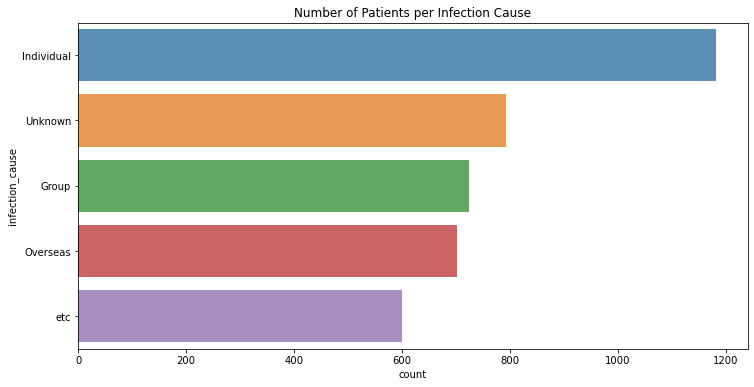

In [33]:
# 다음과 같이 유형의 label을 바꾸어서 다시 집계 및 시각화 해본다.
# 'contact with patient' => 'Individual'     개인접촉
# 'etc'  or NaN         => 'Unknown'         모름
# 'overseas inflow'     => 'Overseas'        해외
#  나머지               => 'Group'            집단

my_dict = {'contact with patient':'Individual', 'etc':'etc', 'overseas inflow': 'Overseas'}
res = df1.infection_case.apply(lambda x: my_dict[x] if x in my_dict.keys() else 'Group' if not pd.isnull(x) else 'Unknown')  # 변환! Pythonic!
# lambda 함수를 활용해 2중 if문을 활용하는 방법 = 더 큰 범위의 if문을 뒤쪽으로 가게 되고 
# 그 앞은 True일때 실행되는 조건이기 때문에 True조건에 if문을 활용하면 첫번째 if문이 True조건을 만족하게 되면 해당 if문을 실행하게 되는 방법
#res = df1.infection_case.apply(my_conversion_func)    # 또다른 방법.
df1['infection_cause'] = res  # 변환을 df1에도 적용.

# df1.head(3)
# 다시 집계하여 시각화 해본다.
res = res.value_counts().sort_values(ascending=False)
display(res)
res = res.reset_index()                                                               # Series => DataFrame. 이전의 Index가 이제는 새로운 컬럼!
display(res)
res.rename(columns={'index':'infection_cause','infection_case':'count'},inplace=True)

plt.figure(figsize = (12,6))                                       # figsize=(가로, 세로) 크기.
sns.barplot(y = 'infection_cause', x= 'count', data = res, alpha=0.8)
plt.title('Number of Patients per Infection Cause')
plt.show()

**결론**: 유입 경로를 4가지로 요약해 봄.

### 4. 유동성 (Mobility Level)

In [34]:
# 새롭게 유입경로 데이터를 불러온다.
df2 = pd.read_csv('C:/study_data/bigdata/별첨 2_DACON_코로나 데이터 분석_업데이트 2/data/PatientRoute.csv')

In [35]:
df2.head()

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.6152,126.7156
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.5672,127.0057
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.5926,127.0170
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.5918,127.0168
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.5640,127.0295


In [36]:
# 결측치의 총 카운트.
df2.isnull().sum().sum()

3264

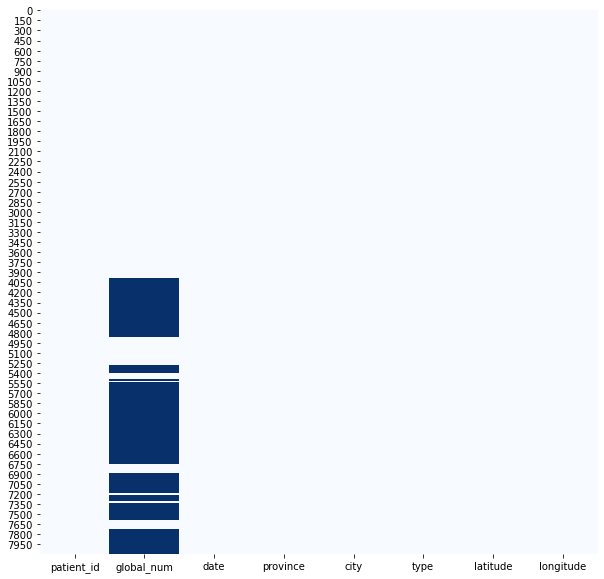

In [37]:
# 결측치를 시각화 해본다.
plt.figure(figsize = (10,10))                                       # figsize=(가로, 세로) 크기.
sns.heatmap(df2.isnull(), cmap='Blues', cbar=False)
plt.show()

In [38]:
# 중복된 환자 ID가 많아 보인다.
print("데이터 행의 수 = {}".format(df2.shape[0]))
print("고유한 환자 ID 수 = {}".format(df2.patient_id.nunique()))

데이터 행의 수 = 8092
고유한 환자 ID 수 = 1472


In [39]:
# 이동 경로의 유형 출력.
print(format(df2.type.unique()))

['airport' 'hospital' 'etc' 'store' 'public_transportation' 'restaurant'
 'church' 'beauty_salon' 'pharmacy' 'pc_cafe' 'bank' 'academy' 'cafe'
 'bakery' 'bar' 'gym' 'school' 'real_estate_agency' 'karaoke'
 'post_office' 'gas_station' 'park' 'lodging' 'university'
 'administrative_area_level_1']


In [40]:
# 이동 경로의 가지수 출력.
print(format(df2.type.nunique()))

25


In [41]:
# 이동 경로의 유형을 카테고리로 표현해 본다.
leisure = ['library', 'theater', 'cafe', 'bakery', 'beauty_salon',
          'pc_cafe', 'billiards','restaurant', 'bar', 'karaoke']
travel = ['airport', 'lodging']
essential_edu = ['primary_school', 'school', 'university']
non_essential_edu = ['academy']
exercise = ['gym', 'mountain', 'park']
essential_admin = ['administrative_area_level_1', 'governmnet_office', 'post_office']
non_essential_admin = ['police_office', 'bank', 'real_estate_agency']
necessity = ['store', 'public_transportation', 'gas_station']
medical = ['hospital', 'pharmacy']
church = ['church']
etc = ['etc']

In [42]:
# "필수적" 카테고리는 다음과 같이 정의한다.
essential = essential_edu + essential_admin + necessity + medical 
len(essential)

11

In [43]:
# 필수/부수적 여부 변수 'is_essential' 파생변수로 추가.
def isessential(x):     
    if x in essential: 
        res = True
    else:
        res = False 
    return res
df2['is_essential'] = df2['type'].apply(isessential) 

# 데이터 프레임 간추리기.
df2 = df2[['patient_id', 'type', 'is_essential']]
df2.head()

,patient_id,type,is_essential
0,1000000001,airport,False
1,1000000001,hospital,True
2,1000000002,etc,False
3,1000000002,store,True
4,1000000002,public_transportation,True


In [44]:
# 동일 환자의 경로 유형을 집계한다 (sum).
# 결측치는 0으로 채운다.
df2['route_value'] = 1       # 1 로 채워진 컬럼을 추가해서 집계의 목적으로 사용한다. sum이 되지만 count의 목적을 띔
df3 = pd.pivot_table(data=df2, index = 'patient_id', columns = 'is_essential', values= 'route_value', aggfunc='sum', fill_value=0)
df3

is_essential,False,True
patient_id,,
1000000001,1,1
1000000002,4,9
1000000003,2,0
1000000004,0,1
1000000005,0,1
...,...,...
6100000086,2,2
6100000087,2,6
6100000088,19,5


In [45]:
# Index로 있는 patient_id를 컬럼으로 빼내고 정리한다.
df3.columns.name=None # 이 column.name은 현재 is_essential로 표현되고 있는 것이다.
df3 = df3.reset_index()
df3 = df3.rename(columns={False:'non_essential',True:'essential'})
df3.head()

,patient_id,non_essential,essential
0,1000000001,1,1
1,1000000002,4,9
2,1000000003,2,0
3,1000000004,0,1
4,1000000005,0,1


In [46]:
df_joined0 = df1.merge(df3, on='patient_id', how='inner')

In [47]:
df_joined0

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,...,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,infection_cause,non_essential,essential
0,1000000001,2.0,male,1964,50,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,...,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,Overseas,1,1
1,1000000002,5.0,male,1987,30,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released,Overseas,4,9
2,1000000003,6.0,male,1964,50,Korea,Seoul,Jongno-gu,NaN,contact with patient,...,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released,Individual,2,0
3,1000000004,7.0,male,1991,20,Korea,Seoul,Mapo-gu,NaN,overseas inflow,...,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released,Overseas,0,1
4,1000000005,9.0,female,1992,20,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,...,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released,Individual,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,6100000086,NaN,male,1966,50,Korea,Gyeongsangnam-do,Changwon-si,NaN,etc,...,NaN,NaN,2020-03-15,2020-03-19,NaN,NaN,isolated,etc,2,2
1468,6100000087,NaN,female,1967,50,Korea,Gyeongsangnam-do,Changwon-si,NaN,etc,...,NaN,NaN,2020-03-16,2020-03-21,NaN,NaN,isolated,etc,2,6
1469,6100000088,NaN,male,1994,20,Korea,Gyeongsangnam-do,Changwon-si,NaN,etc,...,NaN,NaN,2020-03-06,2020-03-22,2020-04-19,NaN,released,etc,19,5
1470,6100000089,NaN,male,1960,60,Korea,Gyeongsangnam-do,Haman-gun,NaN,etc,...,6002000035,NaN,2020-03-22,2020-03-23,NaN,NaN,released,etc,1,1


In [48]:
# df1 (PatientInfo)와 df3 (PatientRoute 요약)을 Inner Join 해서 가로 방향으로 붙여서 df_joined를 만든다.
df_joined = df1.merge(df3, left_on = 'patient_id', right_on = 'patient_id' , how='inner')

In [49]:
# 살펴본다.
df_joined.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,...,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,infection_cause,non_essential,essential
0,1000000001,2.0,male,1964,50,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,...,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,Overseas,1,1
1,1000000002,5.0,male,1987,30,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released,Overseas,4,9
2,1000000003,6.0,male,1964,50,Korea,Seoul,Jongno-gu,NaN,contact with patient,...,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released,Individual,2,0
3,1000000004,7.0,male,1991,20,Korea,Seoul,Mapo-gu,NaN,overseas inflow,...,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released,Overseas,0,1
4,1000000005,9.0,female,1992,20,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,...,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released,Individual,0,1


In [50]:
# 모든 환자에 대해서 동선이 명확한 것이 아니기 때문에 Join 후 대폭 행의 수가 줄어 들었다.
print("Number of Rows Before = {}".format(len(df1)))
print("Number of Rows After = {}".format(len(df_joined)))

Number of Rows Before = 4004
Number of Rows After = 1472


### 5. 접촉 빈도 (Number of Contacts)

In [51]:
df_joined['contact_number'].unique()

array(['75', '31', '17', '9', '2', '43', '0', '68', '6', '23', '117',
       '27', '8', nan, '3', '1', '1000000772', '1000000796', '1091',
       '131', '16', '14', '4', '19', '296', '15', '34', '37', '22', '7',
       '10', '28', '21', '5', '25', '18', '11', '30', '41', '71', '38',
       '13', '24', '185', '160', '1160', '450', '65', '156', '39', '47',
       '86', '74', '12', '40', '-', '95', '290', '32', '45', '35', '51',
       '130', '53', '106', '174', '78', '89', '113'], dtype=object)

In [52]:
# contact_number가 결측치가 아니고 '-'가 아닌 행들만 가져온다. '-'는 오류로 유입된 값인듯.
res = df_joined.contact_number
df_joined = df_joined[~res.isnull()]
df_joined = df_joined[res != '-']
# df_joined = df_joined[~res.isnull() & (res != '-')]

In [53]:
df_joined['contact_number'].unique()

array(['75', '31', '17', '9', '2', '43', '0', '68', '6', '23', '117',
       '27', '8', '3', '1', '1000000772', '1000000796', '1091', '131',
       '16', '14', '4', '19', '296', '15', '34', '37', '22', '7', '10',
       '28', '21', '5', '25', '18', '11', '30', '41', '71', '38', '13',
       '24', '185', '160', '1160', '450', '65', '156', '39', '47', '86',
       '74', '12', '40', '95', '290', '32', '45', '35', '51', '130', '53',
       '106', '174', '78', '89', '113'], dtype=object)

In [54]:
# contact_number의 자료형을 integer로 변경하고 이상값은 제거한다.
df_joined['contact_number'] = df_joined.contact_number.astype(int)
df_joined = df_joined[df_joined.contact_number < 10000]

In [55]:
df_joined['contact_number'].unique()

array([  75,   31,   17,    9,    2,   43,    0,   68,    6,   23,  117,
         27,    8,    3,    1, 1091,  131,   16,   14,    4,   19,  296,
         15,   34,   37,   22,    7,   10,   28,   21,    5,   25,   18,
         11,   30,   41,   71,   38,   13,   24,  185,  160, 1160,  450,
         65,  156,   39,   47,   86,   74,   12,   40,   95,  290,   32,
         45,   35,   51,  130,   53,  106,  174,   78,   89,  113])

In [56]:
# 최대 첩촉빈도.
df_joined.contact_number.max()

1160

In [57]:
# 최대 첩촉빈도에 해당하는 환자.
df_joined[df_joined.contact_number == df_joined.contact_number.max()]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,...,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,infection_cause,non_essential,essential
901,1200000031,31.0,female,1959,60,Korea,Daegu,NaN,NaN,Shincheonji Church,...,NaN,1160,NaN,2020-02-18,NaN,NaN,isolated,Group,5,11


In [58]:
# 필요한 컬럼만 가져와서 정리한다.
df4 = df_joined[['patient_id', 'contact_number', 'essential','non_essential','infection_cause']]
df4.head()

,patient_id,contact_number,essential,non_essential,infection_cause
0,1000000001,75,1,1,Overseas
1,1000000002,31,9,4,Overseas
2,1000000003,17,0,2,Individual
3,1000000004,9,1,0,Overseas
4,1000000005,2,1,0,Individual


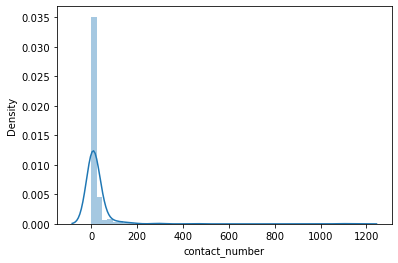

In [59]:
# 접촉 빈도를 히스토그램으로 시각화 한다.
sns.distplot(df4.contact_number,bins=50)
plt.show()

### 6. 군집화 (Clustering)

In [60]:
# 원핫 엔코딩과 역활이 같지만 drop_first를 사용해서 첫 열을 날려줄 수 있다.
pd.get_dummies(df4.infection_cause, prefix='infection',drop_first=True)

,infection_Individual,infection_Overseas,infection_Unknown,infection_etc
0,0,1,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
1242,0,0,1,0
1244,0,0,1,0
1246,0,0,1,0
1317,0,0,1,0


In [61]:
# Infection_cause를 가변수 처리한다.
df4 = df4.join(pd.get_dummies(df4.infection_cause, prefix='infection',drop_first=False))

In [62]:
df4

,patient_id,contact_number,essential,non_essential,infection_cause,infection_Group,infection_Individual,infection_Overseas,infection_Unknown,infection_etc
0,1000000001,75,1,1,Overseas,0,0,1,0,0
1,1000000002,31,9,4,Overseas,0,0,1,0,0
2,1000000003,17,0,2,Individual,0,1,0,0,0
3,1000000004,9,1,0,Overseas,0,0,1,0,0
4,1000000005,2,1,0,Individual,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1242,6001000045,4,4,0,Unknown,0,0,0,1,0
1244,6001000061,2,1,3,Unknown,0,0,0,1,0
1246,6001000063,1,1,0,Unknown,0,0,0,1,0
1317,6014000001,11,1,4,Unknown,0,0,0,1,0


In [63]:
df_final = df4[ ['essential', 'non_essential', 'contact_number',
          'infection_Group', 'infection_Individual', 'infection_Overseas', 'infection_Unknown']]

In [64]:
df_final

,essential,non_essential,contact_number,infection_Group,infection_Individual,infection_Overseas,infection_Unknown
0,1,1,75,0,0,1,0
1,9,4,31,0,0,1,0
2,0,2,17,0,1,0,0
3,1,0,9,0,0,1,0
4,1,0,2,0,1,0,0
...,...,...,...,...,...,...,...
1242,4,0,4,0,0,0,1
1244,1,3,2,0,0,0,1
1246,1,0,1,0,0,0,1
1317,1,4,11,0,0,0,1


In [65]:
# 컬럼의 표준화를 실행한다.
X = df_final.values                        
my_scaler = StandardScaler() # 표준화를 해주는 모듈
X = my_scaler.fit_transform(X)

In [66]:
# 군집의 수 = 4로 정하고 군집화를 실행한다.  <= 군집의 수 최적화가 선행되어야 한다! (부록 참고)
my_km = KMeans(n_clusters = 4, random_state = 123)
my_km.fit(X)

my_centroids = my_km.cluster_centers_               # 개개 군집의 중심점.
my_cluster_labels = my_km.labels_                   # 군집 label.

In [67]:
# 클러스터 중심을 출력하고 해석한다.
pd.DataFrame(my_centroids,columns = df_final.columns)

,essential,non_essential,contact_number,infection_Group,infection_Individual,infection_Overseas,infection_Unknown
0,0.0465,7.4622e-17,-0.0588,-0.5458,0.7916,-0.4820,-0.2933
1,-0.6646,-4.4635e-01,-0.1986,-0.5458,-0.7916,-0.4820,3.4089
2,-0.1589,-2.3419e-01,-0.0300,-0.5458,-0.7916,2.0747,-0.2933
3,0.2556,3.4239e-01,0.2186,1.8043,-0.7916,-0.4820,-0.2933


**해석:** <br>
- Label 0 : Social minimalists.
- Label 1 : Moderate unknwons.
- Label 2 : Overseas non-essentialists.
- Label 3 : Hyper-mobile and hyper-social.

In [71]:
# PCA 차원축소 (2차원).
my_pca = PCA(n_components = 2)
transformed_comps = my_pca.fit_transform(X)         # Transformed 된 좌표.
df_transformed_comps = pd.DataFrame(data = transformed_comps, columns = ['PC1', 'PC2'])
df_transformed_comps=df_transformed_comps.join(pd.Series(my_cluster_labels, name='cluster_label'))
df_transformed_comps

,PC1,PC2,cluster_label
0,-0.7120,-1.5603,2
1,0.9077,-0.9076,2
2,-1.1427,1.1586,0
3,-1.0936,-1.5832,2
4,-1.2024,1.1805,0
...,...,...,...
361,-1.1327,-1.1745,1
362,-1.4379,-1.3144,1
363,-1.7209,-1.3901,1
364,-1.3057,-1.2894,1


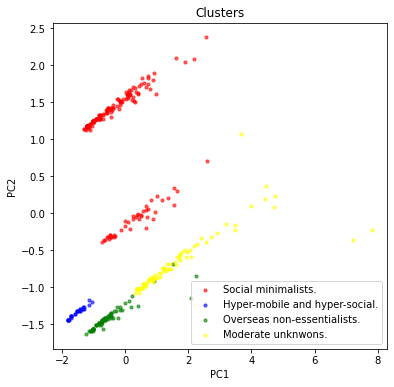

In [72]:
# 산점도 시각화.
my_colors = {0:'red',1:'blue',2:'green',3:'yellow'}    # 군집 label => Color.
my_names = {0: 'Social minimalists.', 1: 'Hyper-mobile and hyper-social.' , 2: 'Overseas non-essentialists.', 3: 'Moderate unknwons.'} # 군집 label => 명칭.

plt.figure(figsize = (6,6))
for a_cluster_n, df_small in df_transformed_comps.groupby('cluster_label'):
    plt.scatter('PC1', 'PC2', data = df_small, c = my_colors[a_cluster_n], label = my_names[a_cluster_n], s = 10, alpha=0.6 )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters')
plt.legend(loc=4)
plt.show()

### 부록: 군집의 수 최적화

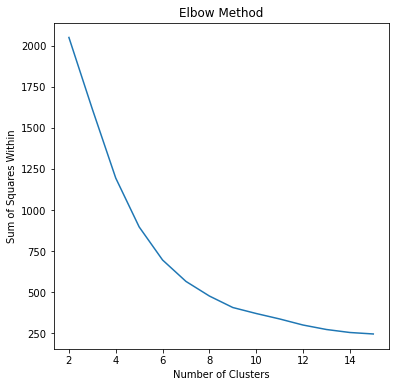

In [70]:
# 군집의 수를 키워가며 Sum of Squares Within을 계산한다.
ssw = []
cluster_ns = range(2,16)
for n in cluster_ns:
    my_cluster = KMeans(n)
    my_cluster.fit(X)
    ssw += [my_cluster.inertia_]         # SSW를 모아둔다.

plt.figure(figsize = (6,6))
plt.plot(cluster_ns, ssw)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squares Within')
plt.show()

**결론**: 군집의 수가 5 이상일 때 SSW의 감소 속도가 둔화된다. => 군집의 적정 수 = 4.